In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.io.wavfile

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Short-time Fourier Transform (STFT)

Procedure:

* Break audio file into (overlapping) chunks
* Apply a window to each chunk
* Run windowed chunk through the FFT


# Hamming Window

In [51]:
sample_rate = 100 # in samples per second
total_time = 10   # in seconds
t = np.linspace(0, total_time, total_time * sample_rate)
original = [5 for i in t]

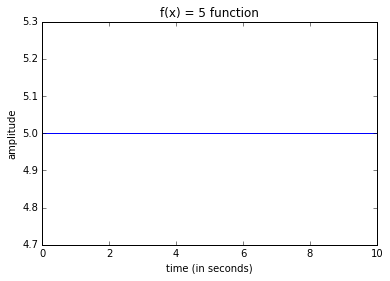

In [52]:
setup_graph(title='f(x) = 5 function', x_label='time (in seconds)', y_label='amplitude')
_ = plt.plot(t, original)

In [53]:
window_size = 100 # 100 points (which is 1 second in this case)
hop_size = window_size // 2

In [54]:
window = scipy.hamming(window_size)

# What the windows look like

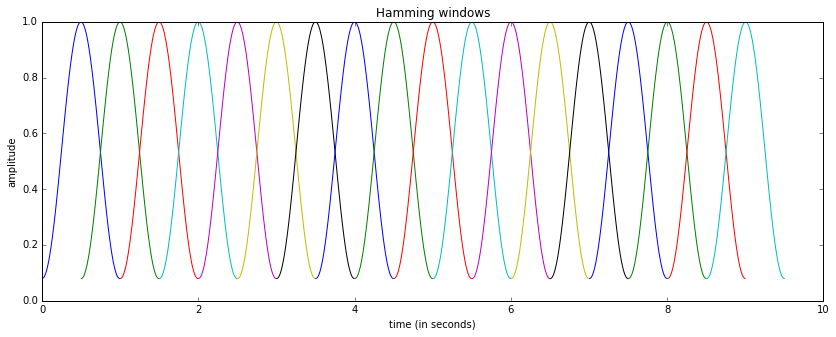

In [55]:
def flatten(lst):
    return [item for sublist in lst for item in sublist]

window_times = [t[i:i+window_size] for i in range(0, len(original)-window_size, hop_size)]
window_graphs = [[wtime, window] for wtime in window_times]
flattened_window_graphs = flatten(window_graphs)

setup_graph(title='Hamming windows', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,5))
_ = plt.plot(*flattened_window_graphs)

# Break up into chunks and apply window

In [56]:
windowed = [window * original[i:i+window_size] for i in range(0, len(original)-window_size, hop_size)]

# Put windowed chunks back together (and compare to original)

### (This is like what the inverse STFT does)

In [57]:
convoluted = scipy.zeros(total_time * sample_rate)
for n,i in enumerate(range(0, len(original)-window_size, hop_size)):
    convoluted[i:i+window_size] += windowed[n]

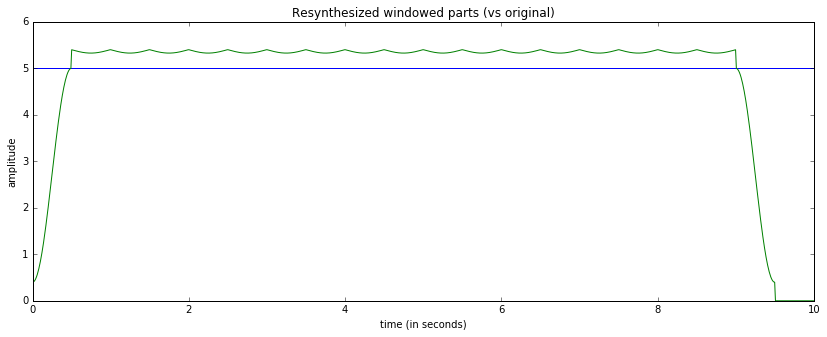

In [58]:
setup_graph(title='Resynthesized windowed parts (vs original)', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,5))
_ = plt.plot(t, original, t, convoluted)

# STFT Code

In [59]:
def stft(input_data, sample_rate, window_size, hop_size):
    window = scipy.hamming(window_size)
    output = scipy.array([scipy.fft(window*input_data[i:i+window_size]) 
                         for i in range(0, len(input_data)-window_size, hop_size)])
    return output

def istft(input_data, sample_rate, window_size, hop_size, total_time):
    output = scipy.zeros(total_time*sample_rate)
    for n,i in enumerate(range(0, len(output)-window_size, hop_size)):
        output[i:i+window_size] += scipy.real(scipy.ifft(input_data[n]))
    return output


# Spectrogram

### The Frequency/Time Uncertainty principle

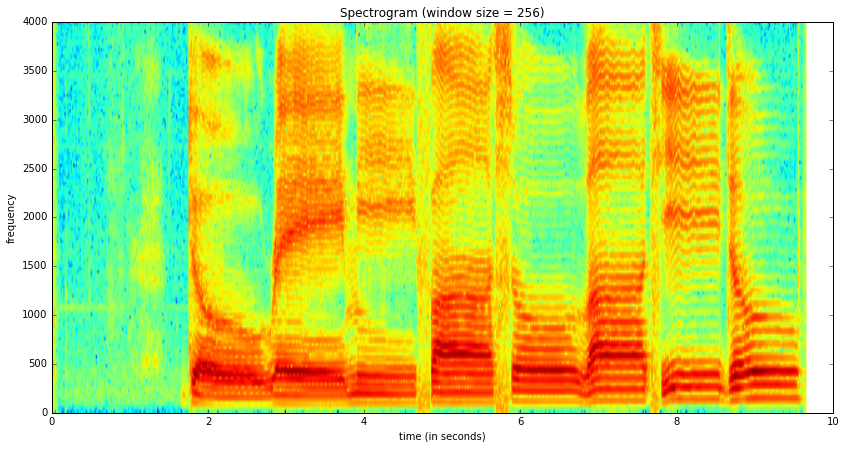

In [60]:
(doremi_sample_rate, doremi) = scipy.io.wavfile.read("audio_files/do-re-mi.wav")
doremi_8000hz = [doremi[i] for i in range(0, len(doremi), 44100//8000)]

setup_graph(title='Spectrogram (window size = 256)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(doremi_8000hz, Fs=8000, NFFT=256)

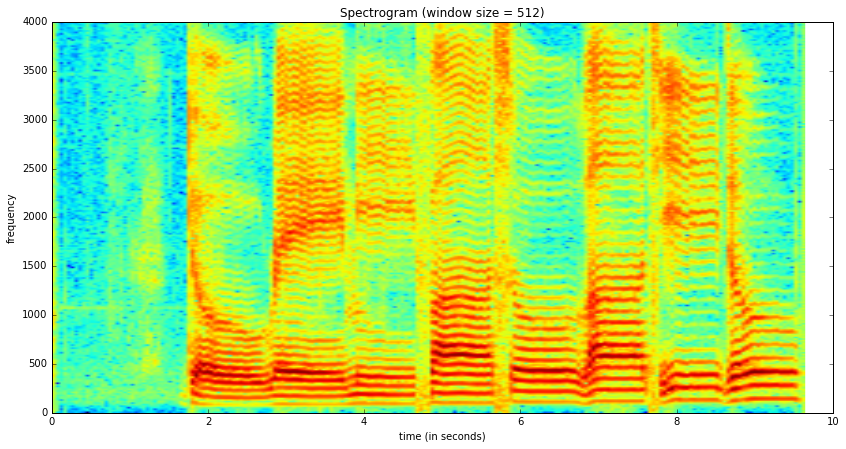

In [61]:
setup_graph(title='Spectrogram (window size = 512)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(doremi_8000hz, Fs=8000, NFFT=512)

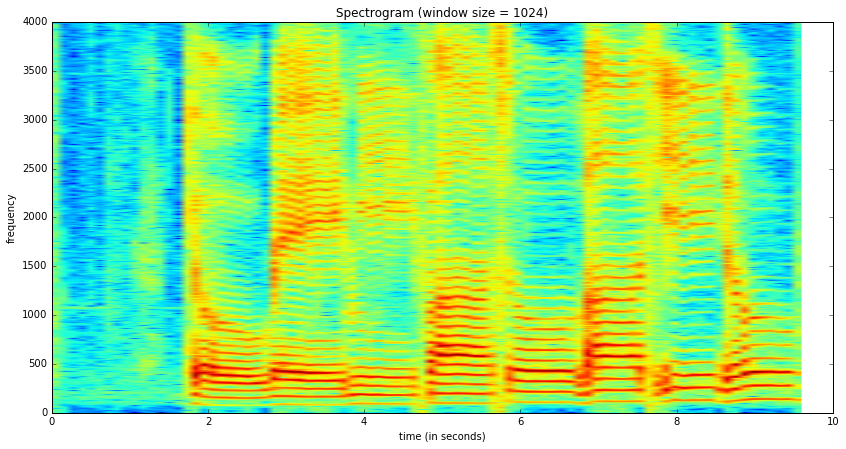

In [62]:
setup_graph(title='Spectrogram (window size = 1024)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(doremi_8000hz, Fs=8000, NFFT=1024)

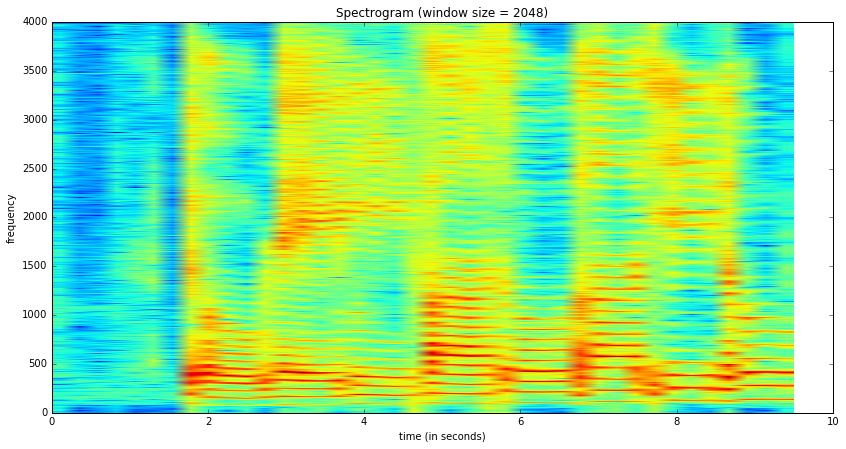

In [63]:
setup_graph(title='Spectrogram (window size = 2048)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(doremi_8000hz, Fs=8000, NFFT=2048)

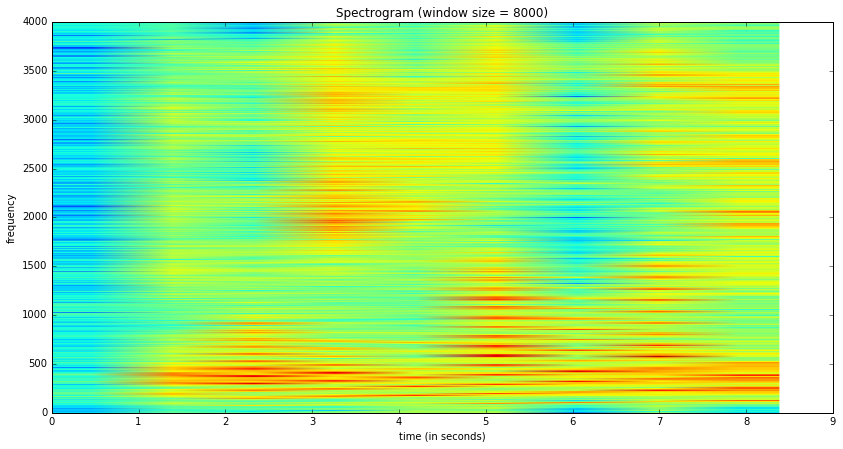

In [64]:
setup_graph(title='Spectrogram (window size = 8000)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(doremi_8000hz, Fs=8000, NFFT=8000)

## Meaning

* So we see that as we take more samples for each FFT, we know more about the frequency
* But since we are taking more samples to represent each "block", the time resolution goes down (since the time block is larger)

## FFT Bin Size

$$fft\ bin\ size = \frac{sample\ rate}{window\ size}$$

* So the larger the window size, the smaller the fft bin size (better frequency resolution)
* And the smaller the window size, the larger the fft bin size (worse frequency resolution)

In [65]:
# Cleanup to reduce notebook size
del doremi, doremi_8000hz, _